IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
data=pd.read_csv(r"C:\Users\ASUS\Downloads\Dataset_ecommerce.csv")
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [4]:
#DECRIPTIVE STAT
data.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [7]:
#CHECK FOR MISSING VALUES
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [9]:
#DROP MISSING VALUES
data.dropna(inplace = True)


In [11]:
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [13]:
#CHECK FOR INFO ON DATAFRAME
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [21]:
#CONVERTING INVOICEDATE TO DATETIME
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Exploratory data analysis
analysis by country

In [11]:
quantity_by_country= data.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country= quantity_by_country.sort_values('Quantity',ascending = False).reset_index()

In [16]:
quantity_by_country

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


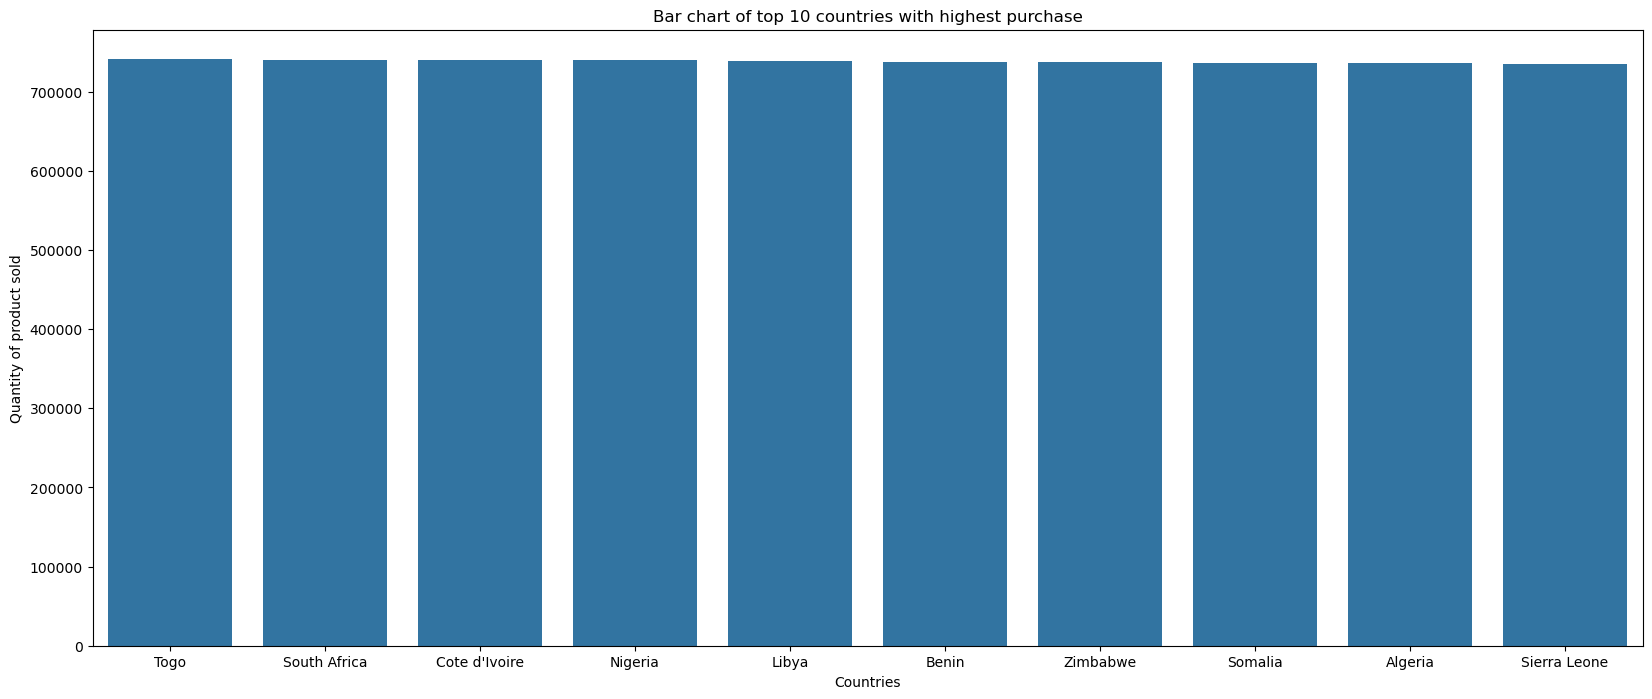

In [12]:
#TOP 10 COUNTRIES WHERE MOST PRODUCTS ARE SOLD
Top_10_country=quantity_by_country.head(10)

plt.figure(figsize =(20,8))
ax=sns.barplot(x='Country',y ='Quantity',data=Top_10_country)

plt.xlabel('Countries')
plt.ylabel('Quantity of product sold')
plt.title('Bar chart of top 10 countries with highest purchase')
plt.show()               
               
               
               

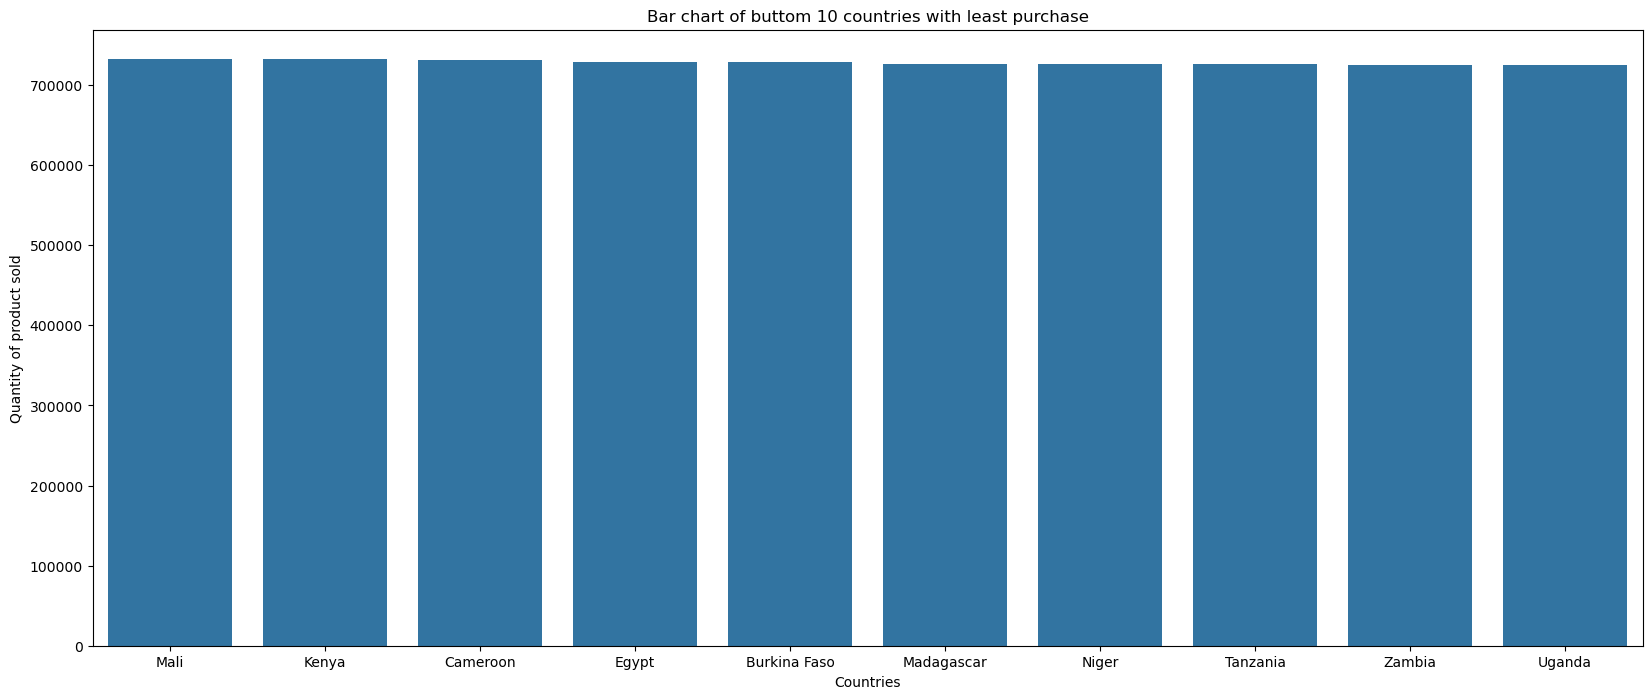

In [23]:
#VISUALISE COUNTRIES WHERE LOWEST NUMBER OF PRODUCTS ARE SOLD
least_10_country=quantity_by_country.tail(10)

plt.figure(figsize =(20,8))
ax=sns.barplot(x='Country',y ='Quantity',data=least_10_country)

plt.xlabel('Countries')
plt.ylabel('Quantity of product sold')
plt.title('Bar chart of buttom 10 countries with least purchase')
plt.show() 

#COUNTRIES WITH MOST NUMBER OF CUSTOMERS

In [13]:
country_to_customer = data.groupby(['Country'])['CustomerID'].nunique().reset_index()
country_to_customer = country_to_customer.sort_values("CustomerID",ascending =False).reset_index()

In [45]:
country_to_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


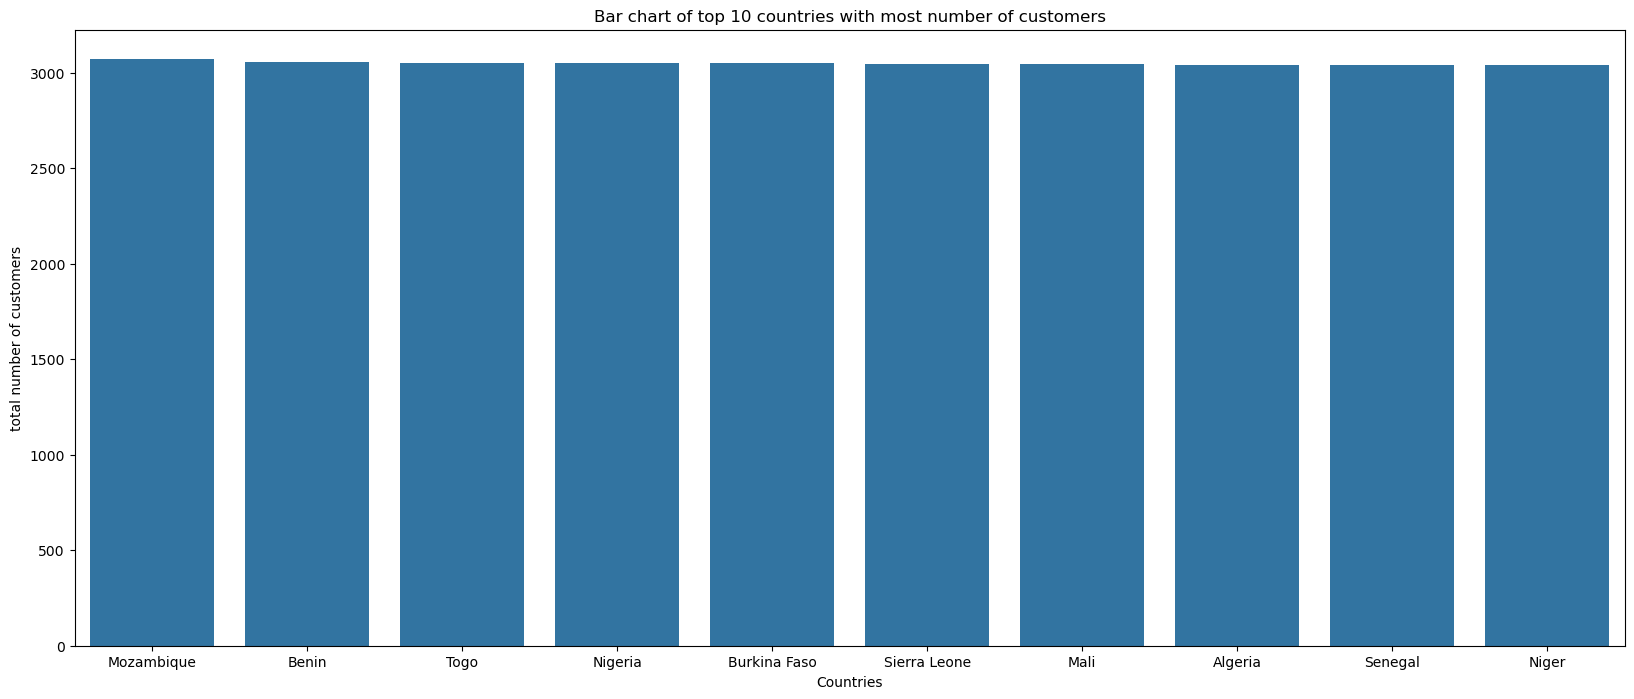

In [14]:
#Draw a plot of top 10 countries wth most number of customers
Top_countries_to_customer=country_to_customer.head(10)

plt.figure(figsize =(20,8))
ax=sns.barplot(x='Country',y ='CustomerID',data=Top_countries_to_customer)

plt.xlabel('Countries')
plt.ylabel('total number of customers')
plt.title('Bar chart of top 10 countries with most number of customers')
plt.show()               
          

SALES TREND VISUALIASATON

In [15]:
Monthly_sales=data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
Monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

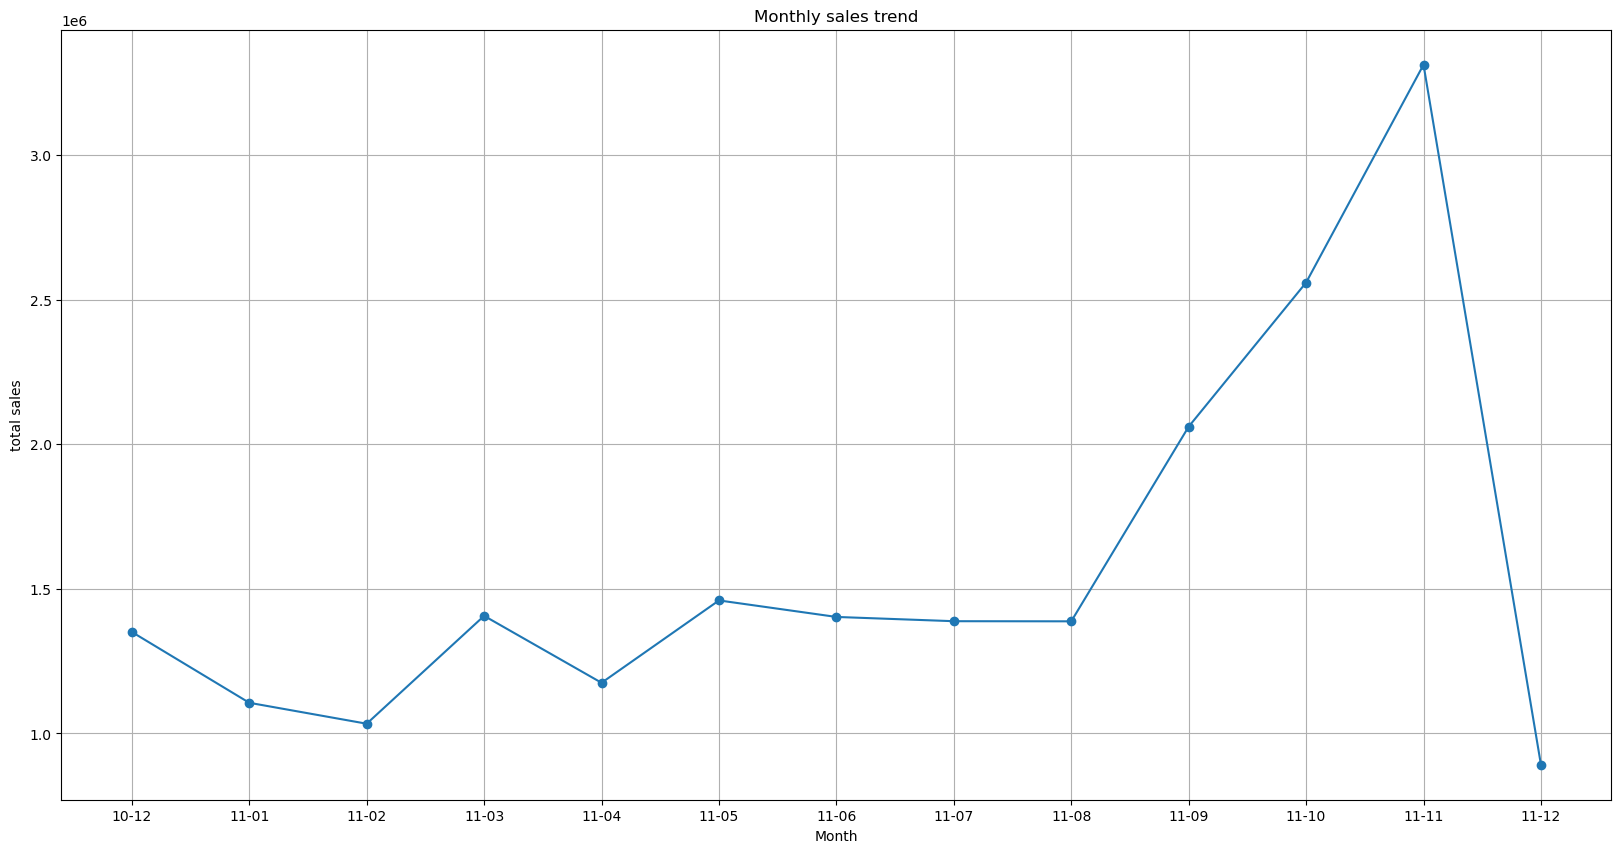

In [16]:
#CREATE A LINE PLOT
plt.figure(figsize =(20,10))
plt.plot(Monthly_sales.index.strftime("%y-%m"),Monthly_sales.values, marker ='o',linestyle ='-')
plt.xlabel("Month")
plt.ylabel('total sales')
plt.title("Monthly sales trend")
plt.grid(True)
plt.show()

COHORT TABLE

In [29]:
#creating invoice month
import datetime as dt
def get_month(x):
    return dt.datetime(x.year,x.month,1)
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12-01
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12-01
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12-01
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12-01
541908,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,6,46.62,Ethiopia,2011-12-01


In [33]:
#CREATING A COLUMN INDEX WITH THE MINIMUM INVOICE DATE AKA FIRST TIME CUSTOMER WAS ACQUIRED
data['cohort month']=data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.tail(30)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,cohort month
541879,581585,2011-12-09 12:31:00,15804.0,SC4544,Cloths,97,58.37,Cameroon,2011-12-01,2011-05-01
541880,581585,2011-12-09 12:31:00,15804.0,SC6980,Cloths,8,20.52,Somalia,2011-12-01,2011-05-01
541881,581585,2011-12-09 12:31:00,15804.0,SC2214,Toys,6,12.73,South Africa,2011-12-01,2011-05-01
541882,581585,2011-12-09 12:31:00,15804.0,SC2914,Shoes,62,66.80,Burkina Faso,2011-12-01,2011-05-01
541883,581585,2011-12-09 12:31:00,15804.0,SC9338,Sports Equipment,34,74.19,Kenya,2011-12-01,2011-05-01
541884,581585,2011-12-09 12:31:00,15804.0,SC9093,Shoes,94,67.61,Zambia,2011-12-01,2011-05-01
541885,581585,2011-12-09 12:31:00,15804.0,SC7239,Toys,25,86.87,Zimbabwe,2011-12-01,2011-05-01
541886,581585,2011-12-09 12:31:00,15804.0,SC4776,Books,82,82.04,Tanzania,2011-12-01,2011-05-01
541887,581585,2011-12-09 12:31:00,15804.0,SC6891,Kitchenware,3,27.96,Senegal,2011-12-01,2011-05-01
541888,581585,2011-12-09 12:31:00,15804.0,SC3286,Toys,68,18.96,Cameroon,2011-12-01,2011-05-01


In [35]:
#create a date element function to get a series for substraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month=df[column].dt.month
    year= df[column].dt.year
    return day,month,year

In [39]:
_,invoice_month,invoice_year = get_date_elements(data,'InvoiceMonth')
_,cohort_month,cohort_year =  get_date_elements(data,'cohort month')

In [41]:
#check the series

cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: cohort month, dtype: int32

In [51]:
#create cohort index
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
data['cohortindex'] = year_diff*12+month_diff+1
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,cohort month,cohortindex
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,2010-12-01,1
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,2010-12-01,1
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,2010-12-01,1
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,2010-12-01,1
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,2010-12-01,1


In [ ]:
COHORT TABLE

In [53]:
cohort_info=data.groupby(['cohort month','cohortindex'])['CustomerID'].nunique().reset_index()

In [55]:
cohort_info.rename(columns={'CustomerID' :'Number of customers'},inplace = True)

In [57]:
cohort_info

,cohort month,cohortindex,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [63]:
cohort_table = cohort_info.pivot(index = 'cohort month',columns = ['cohortindex'],values = 'Number of customers')
cohort_table.index = cohort_table.index.strftime('%B %Y')

In [65]:
cohort_table

cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort month,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohortindex', ylabel='cohort month'>

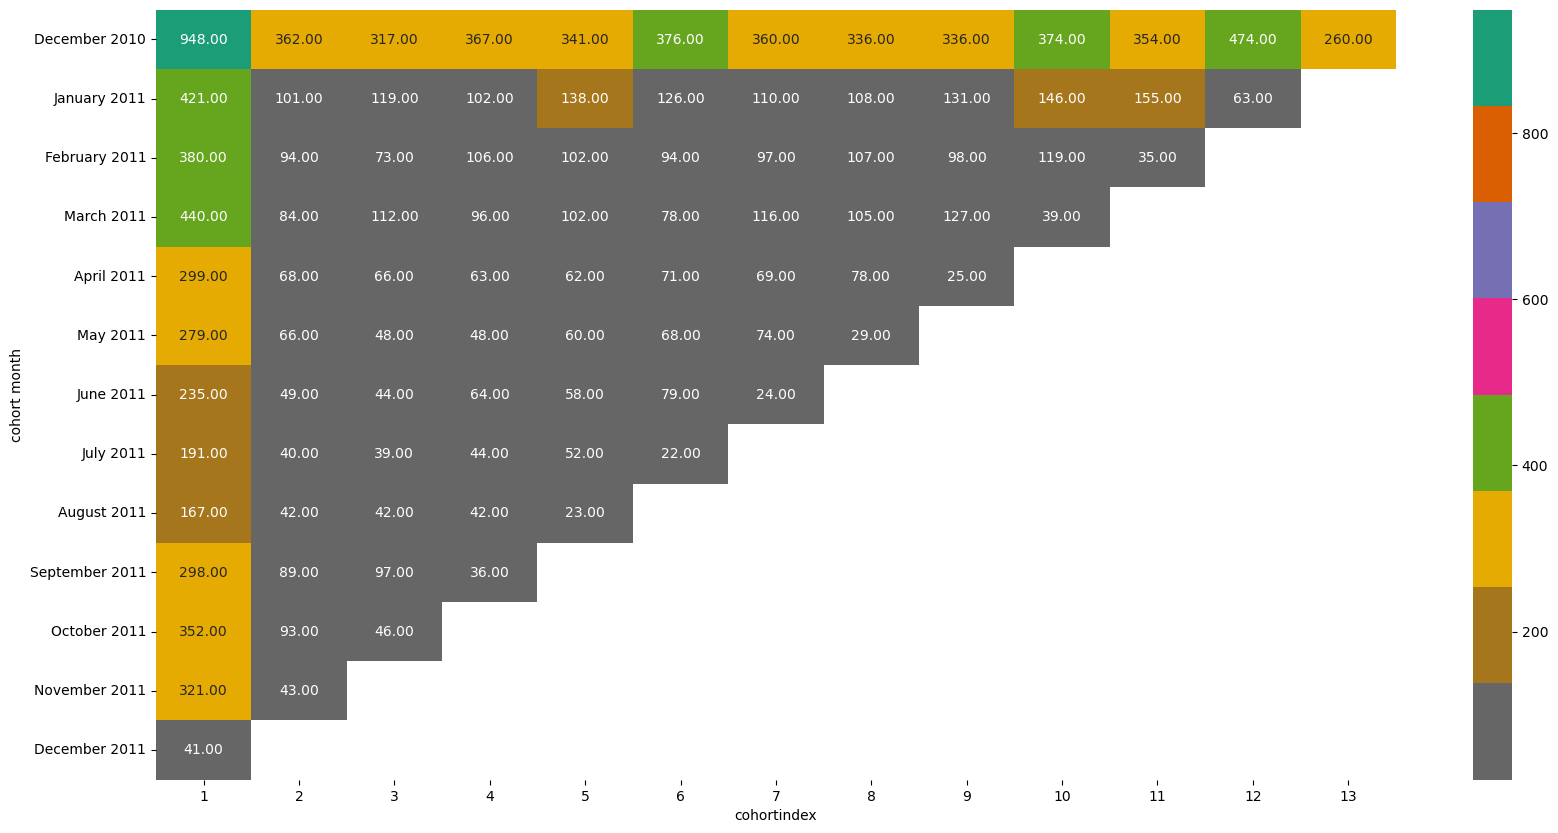

In [71]:
plt.figure(figsize =(20,10))
sns.heatmap(cohort_table,annot = True,cmap = 'Dark2_r', fmt='.2f')

In [77]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

In [79]:
new_cohort_table

cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort month,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohortindex', ylabel='cohort month'>

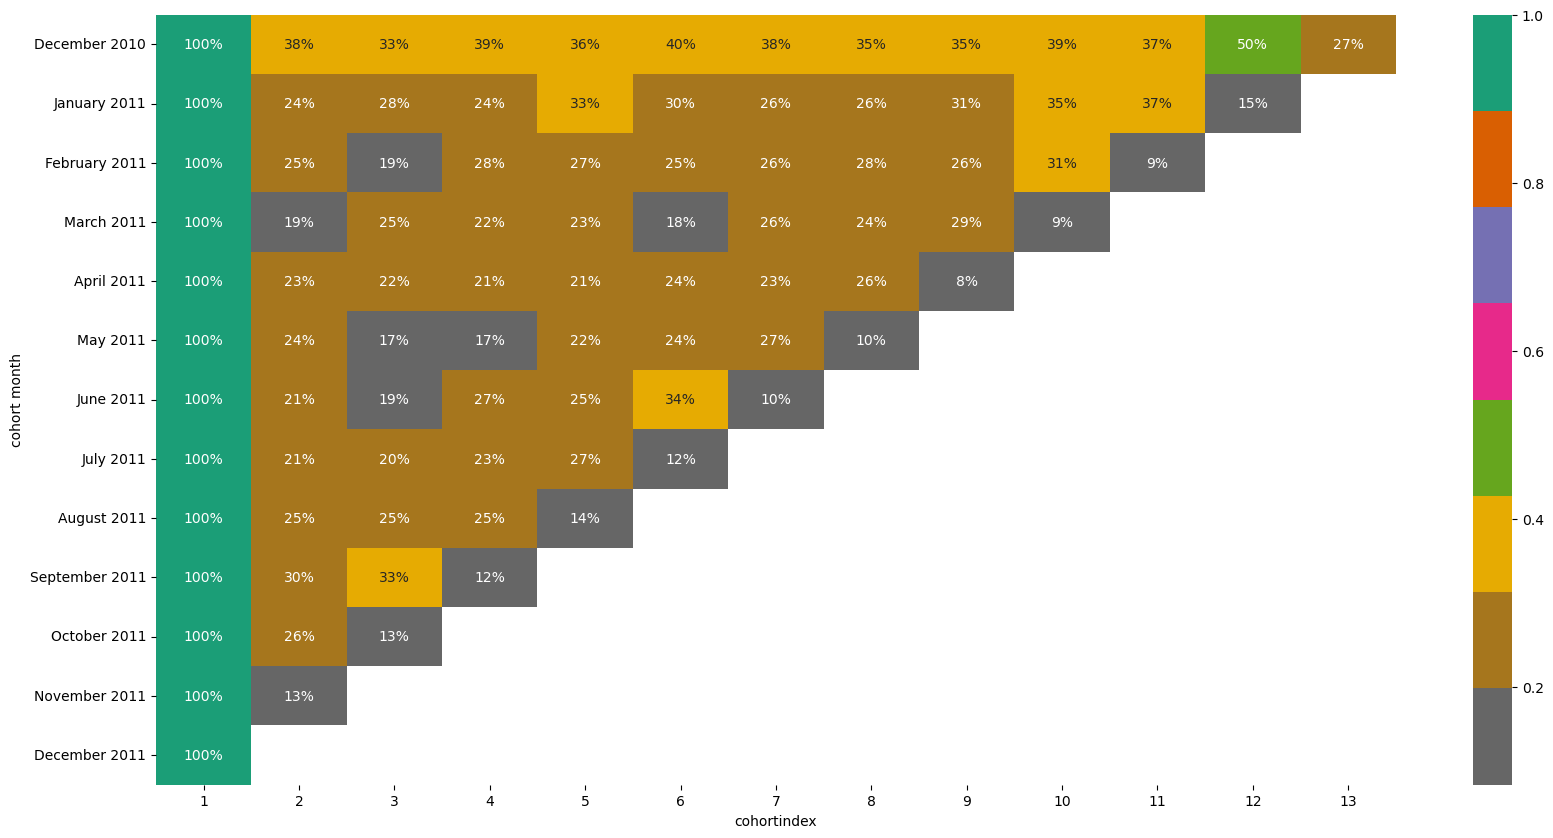

In [81]:
plt.figure(figsize =(20,10))
sns.heatmap(new_cohort_table,annot = True,cmap = 'Dark2_r', fmt='.0%')

Quantity bought

In [103]:
quantity_bought=data.groupby(['cohort month','cohortindex'])['Quantity'].mean().reset_index()

In [105]:
quantity_bought

,cohort month,cohortindex,Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


In [109]:
quantity_table=quantity_bought.pivot(index = 'cohort month', columns= ['cohortindex'], values = 'Quantity')
quantity_table.index=quantity_table.index.strftime('%B %Y')


In [111]:
quantity_table

cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort month,,,,,,,,,,,,,
December 2010,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
January 2011,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
February 2011,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
March 2011,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
April 2011,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
May 2011,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
June 2011,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohortindex', ylabel='cohort month'>

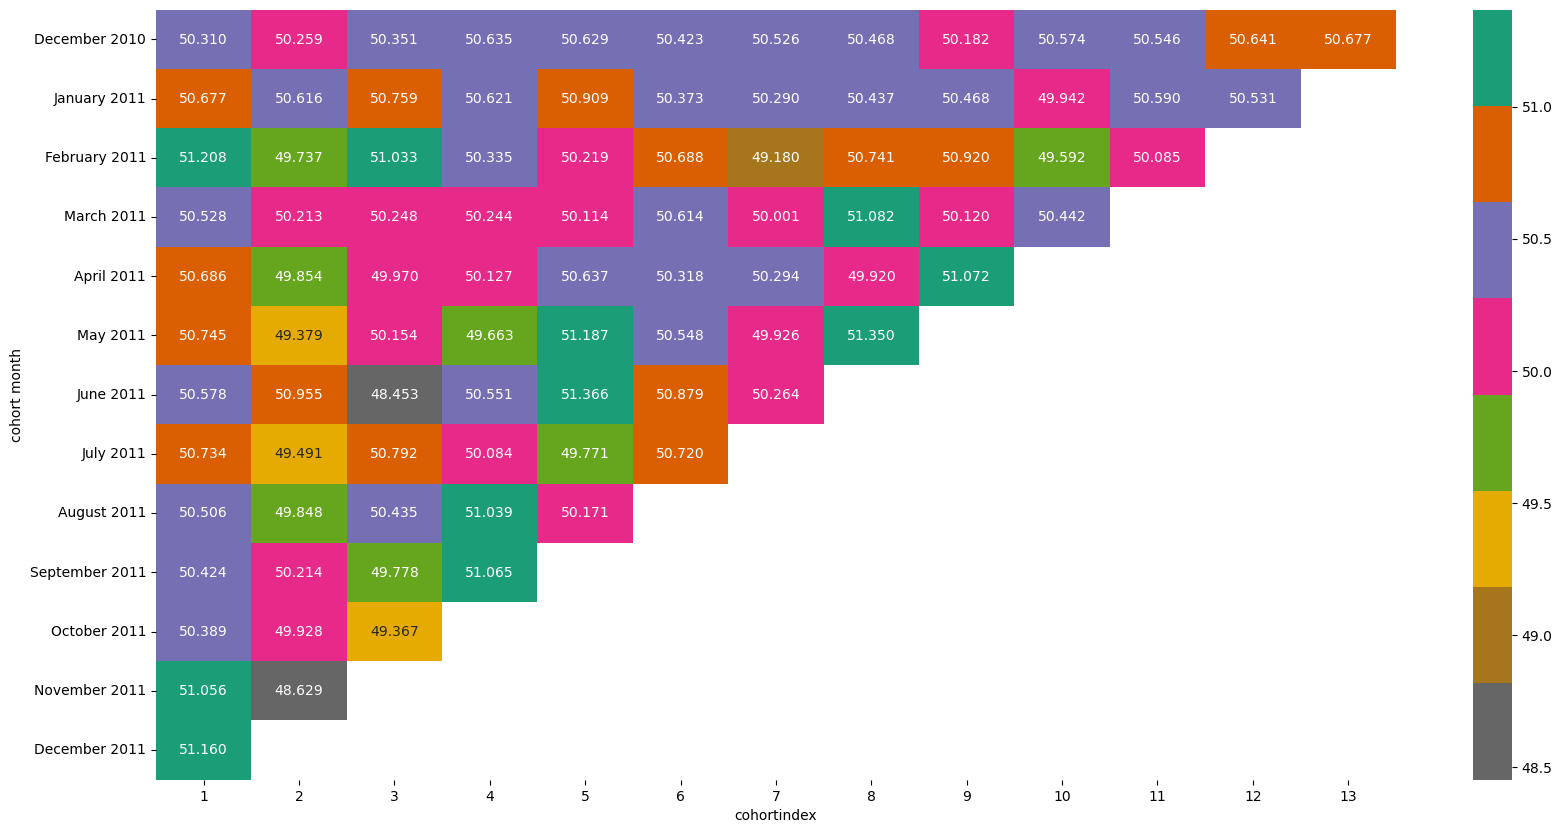

In [113]:
plt.figure(figsize =(20,10))
sns.heatmap(quantity_table,annot = True,cmap = 'Dark2_r', fmt='.3f')